In [1]:
import pandas as pd 
import geopandas as gpd 
import matplotlib.pyplot as plt 
import os
import os.path

In [2]:
comunas_caba_shp = "comunas.shp"
rampas_relevamiento_2016 = "rampas-de-accesibilidad-relevamiento-2016.csv"
path_datasets = os.path.join(os.getcwd())

In [3]:
comunas = gpd.read_file(os.path.join(path_datasets, comunas_caba_shp))
comunas.head(3) #primeros tres

,ID,OBJETO,COMUNAS,BARRIOS,PERIMETRO,AREA,geometry
0,1,LIMITE COMUNAL,2.0,RECOLETA,21452.838648,6.317265e+06,"POLYGON ((-58.38000 -34.57002, -58.38002 -34.5..."
1,3,LIMITE COMUNAL,6.0,CABALLITO,10990.964471,6.851029e+06,"POLYGON ((-58.43061 -34.60705, -58.43056 -34.6..."
2,6,LIMITE COMUNAL,10.0,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07,"POLYGON ((-58.48834 -34.62016, -58.48820 -34.6..."


<AxesSubplot:>

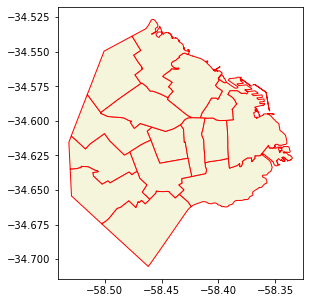

In [5]:
comunas.plot(figsize=(5,5), color='beige', edgecolor='red')

In [6]:
comunas['coords'] = comunas['geometry'].apply(lambda x: x.representative_point().coords[:])
type(comunas)
comunas.head(3)

,ID,OBJETO,COMUNAS,BARRIOS,PERIMETRO,AREA,geometry,coords
0,1,LIMITE COMUNAL,2.0,RECOLETA,21452.838648,6.317265e+06,"POLYGON ((-58.38000 -34.57002, -58.38002 -34.5...","[(-58.39335394881411, -34.58402012780999)]"
1,3,LIMITE COMUNAL,6.0,CABALLITO,10990.964471,6.851029e+06,"POLYGON ((-58.43061 -34.60705, -58.43056 -34.6...","[(-58.44345867055251, -34.61687384741095)]"
2,6,LIMITE COMUNAL,10.0,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07,"POLYGON ((-58.48834 -34.62016, -58.48820 -34.6...","[(-58.503129090909304, -34.62748921603462)]"


In [7]:
comunas['coords'] = [coords[0] for coords in comunas['coords']]
comunas['coords']

0       (-58.39335394881411, -34.58402012780999)
1       (-58.44345867055251, -34.61687384741095)
2      (-58.503129090909304, -34.62748921603462)
3       (-58.50082020876248, -34.60296451410308)
4       (-58.49057305772952, -34.56625739628468)
5       (-58.42270975961914, -34.57427408391895)
6       (-58.4668147137596, -34.590124613219686)
7      (-58.45423819580623, -34.554787950559515)
8      (-58.391714309443955, -34.63994109590304)
9     (-58.420549629232745, -34.618844705165436)
10      (-58.44834809730983, -34.63526070464371)
11      (-58.40227550909182, -34.61438802928427)
12     (-58.496753683144135, -34.65374549776169)
13    (-58.468149405683874, -34.678105831485006)
14      (-58.36914454898066, -34.60589526999567)
Name: coords, dtype: object

In [8]:
comunas['label'] = comunas.apply(lambda df : 'Comuna ' + str(int(df['COMUNAS'])),axis=1)
comunas['label'].head(3)

0     Comuna 2
1     Comuna 6
2    Comuna 10
Name: label, dtype: object

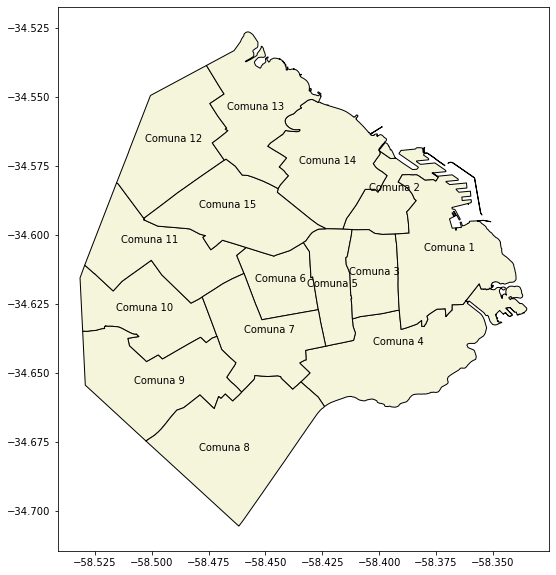

In [9]:
fig, ax = plt.subplots(figsize = (10,10))
comunas.plot(ax = ax, color='beige', edgecolor='black')
for idx, row in comunas.iterrows():
    plt.annotate(text = row['label'], xy = row['coords'],horizontalalignment = 'center', color='black')


In [10]:
rampas_2016 = pd.read_csv(os.path.join(path_datasets,rampas_relevamiento_2016),delimiter=';')
rampas_2016

,X,Y,ID,MES,SEMANA,ZONA,CALLE,ALTURA,ESTADO,DOM_NORMA,DOM_GEO
0,-58.401517,-34.613463,1,AGOSTO,1 AL 6,2 Y 3,ALBERTI,315.0,FINALIZADO,ALBERTI 315,315 ALBERTI
1,-58.403174,-34.598833,2,AGOSTO,1 AL 6,2 Y 3,CORDOBA AV,2554.0,FINALIZADO,CORDOBA AV. 2554,2554 CORDOBA AV.
2,-58.394427,-34.618371,3,AGOSTO,1 AL 6,2 Y 3,INDEPENDENCIA AV,1998.0,FINALIZADO,INDEPENDENCIA AV. 1998,1998 INDEPENDENCIA AV.
3,-58.512667,-34.609169,4,AGOSTO,1 AL 6,4,SIMBRON Y MARCOS PAZ,NaN,FINALIZADO,"SIMBRON Y PAZ, MARCOS","SIMBRON & PAZ, MARCOS"
4,-58.510953,-34.609638,5,AGOSTO,1 AL 6,4,TINOGASTA Y ZURICH,NaN,FINALIZADO,TINOGASTA Y ZURICH,TINOGASTA & ZURICH
...,...,...,...,...,...,...,...,...,...,...,...
2950,-58.482653,-34.581977,2997,NOVIEMBRE,21 AL 26,15,BALLIVIAN,2896.0,EN EJECUCIÓN,BALLIVIAN 2896,2896 BALLIVIAN
2951,-58.481805,-34.581305,2998,NOVIEMBRE,21 AL 26,15,BALLIVIAN,2799.0,EN EJECUCIÓN,BALLIVIAN 2799,2799 BALLIVIAN
2952,-58.482766,-34.582043,2999,NOVIEMBRE,21 AL 26,15,BALLIVIAN,2902.0,EN EJECUCIÓN,BALLIVIAN 2902,2902 BALLIVIAN
2953,-58.482867,-34.581925,3000,NOVIEMBRE,21 AL 26,15,BALLIVIAN,2901.0,EN EJECUCIÓN,BALLIVIAN 2901,2901 BALLIVIAN


In [11]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(rampas_2016['X'],rampas_2016['Y'])]
geometry[:3]

In [12]:
rampas_2016_gdf = gpd.GeoDataFrame(rampas_2016,crs='epsg:4326',geometry=geometry,)
rampas_2016_gdf

,X,Y,ID,MES,SEMANA,ZONA,CALLE,ALTURA,ESTADO,DOM_NORMA,DOM_GEO,geometry
0,-58.401517,-34.613463,1,AGOSTO,1 AL 6,2 Y 3,ALBERTI,315.0,FINALIZADO,ALBERTI 315,315 ALBERTI,POINT (-58.40152 -34.61346)
1,-58.403174,-34.598833,2,AGOSTO,1 AL 6,2 Y 3,CORDOBA AV,2554.0,FINALIZADO,CORDOBA AV. 2554,2554 CORDOBA AV.,POINT (-58.40317 -34.59883)
2,-58.394427,-34.618371,3,AGOSTO,1 AL 6,2 Y 3,INDEPENDENCIA AV,1998.0,FINALIZADO,INDEPENDENCIA AV. 1998,1998 INDEPENDENCIA AV.,POINT (-58.39443 -34.61837)
3,-58.512667,-34.609169,4,AGOSTO,1 AL 6,4,SIMBRON Y MARCOS PAZ,NaN,FINALIZADO,"SIMBRON Y PAZ, MARCOS","SIMBRON & PAZ, MARCOS",POINT (-58.51267 -34.60917)
4,-58.510953,-34.609638,5,AGOSTO,1 AL 6,4,TINOGASTA Y ZURICH,NaN,FINALIZADO,TINOGASTA Y ZURICH,TINOGASTA & ZURICH,POINT (-58.51095 -34.60964)
...,...,...,...,...,...,...,...,...,...,...,...,...
2950,-58.482653,-34.581977,2997,NOVIEMBRE,21 AL 26,15,BALLIVIAN,2896.0,EN EJECUCIÓN,BALLIVIAN 2896,2896 BALLIVIAN,POINT (-58.48265 -34.58198)
2951,-58.481805,-34.581305,2998,NOVIEMBRE,21 AL 26,15,BALLIVIAN,2799.0,EN EJECUCIÓN,BALLIVIAN 2799,2799 BALLIVIAN,POINT (-58.48180 -34.58131)
2952,-58.482766,-34.582043,2999,NOVIEMBRE,21 AL 26,15,BALLIVIAN,2902.0,EN EJECUCIÓN,BALLIVIAN 2902,2902 BALLIVIAN,POINT (-58.48277 -34.58204)
2953,-58.482867,-34.581925,3000,NOVIEMBRE,21 AL 26,15,BALLIVIAN,2901.0,EN EJECUCIÓN,BALLIVIAN 2901,2901 BALLIVIAN,POINT (-58.48287 -34.58193)


In [13]:
rampas_2016_gdf['ESTADO'].unique()# Saber cuales son los tipos de estado

array(['FINALIZADO', 'EN EJECUCIÓN'], dtype=object)

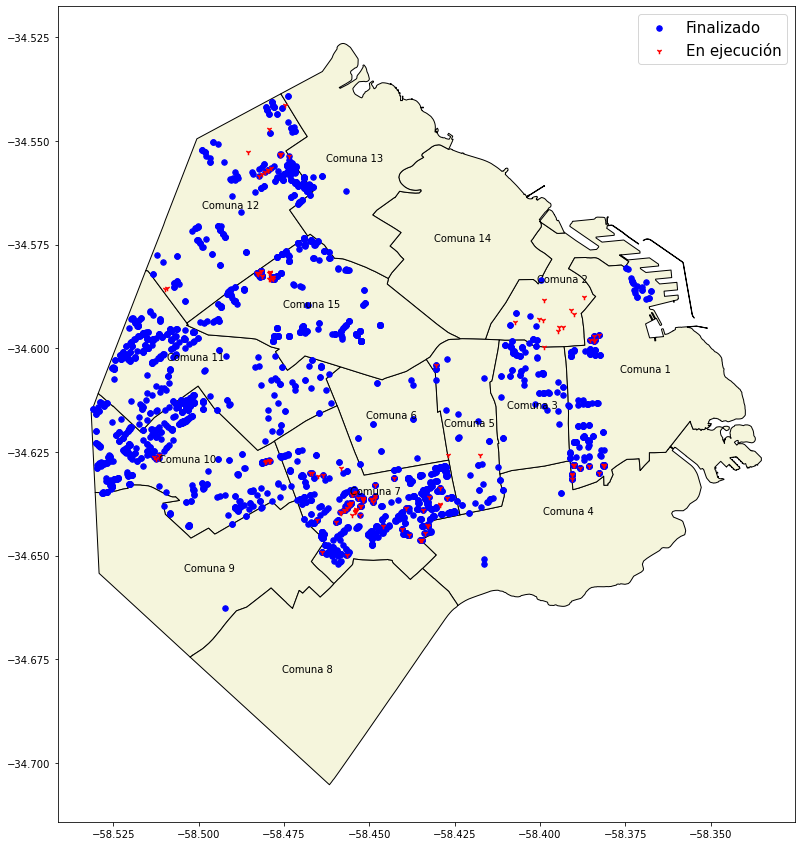

In [16]:
fig, ax = plt.subplots(figsize = (15,15))
comunas.plot(ax = ax, color='beige', edgecolor='black')

for idx, row in comunas.iterrows():
    plt.annotate(text=row['label'], xy=row['coords'],horizontalalignment='center', color='black')

rampas_2016_gdf[rampas_2016_gdf['ESTADO']=='FINALIZADO'].plot(ax=ax,markersize=30, color='blue', marker='o', label='Finalizado')
rampas_2016_gdf[rampas_2016_gdf['ESTADO']=='EN EJECUCIÓN'].plot(ax=ax,markersize=30, color='red', marker='1', label='En ejecución')
plt.legend(prop={'size': 15})
